<a href="https://colab.research.google.com/github/Dishant0210/Car_Purchasing-model/blob/main/Car__Purchasing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load the dataset
df=pd.read_csv("/content/drive/MyDrive/Deep Learning/car_purchasing.csv",encoding="ISO-8859-1")

In [3]:
#To see first 5 records
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
#To drop unwanted column
df.drop(columns=['customer name','customer e-mail','country','gender'],inplace=True)

In [5]:
#To see first 5 records
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
#To see numbers of rows and column
df.shape

(500, 5)

In [7]:
#To see information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [8]:
#To see statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [9]:
#To see name of the column
df.columns

Index(['age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [10]:
#To see if null values are present or not
df.isnull().sum()

age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

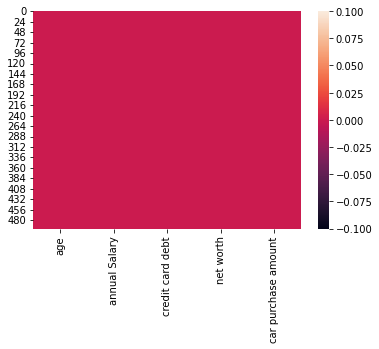

In [11]:
#To visualizing the null value
sb.heatmap(df.isnull())
plt.show()
#This indicates that there is no null value present in the data 

In [12]:
#To see if duplicate values are present or not
df.duplicated().sum()

0

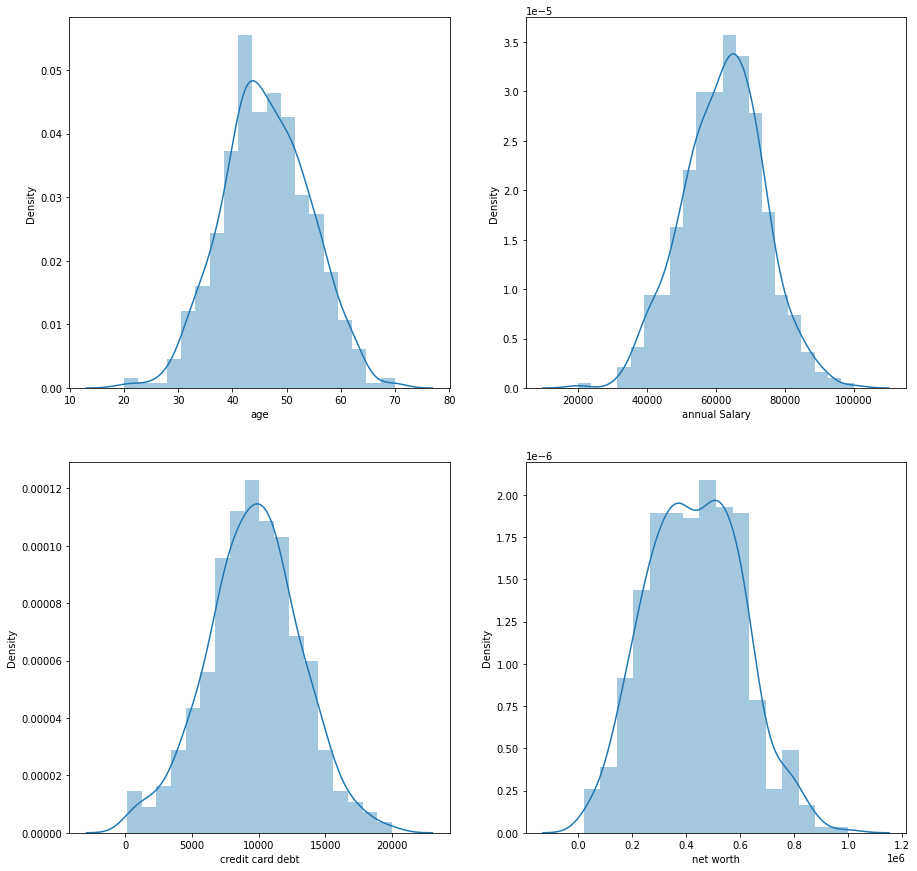

In [13]:
#To do some visualization
num_cols=['age','annual Salary','credit card debt','net worth']
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sb.distplot(df[i[1]])

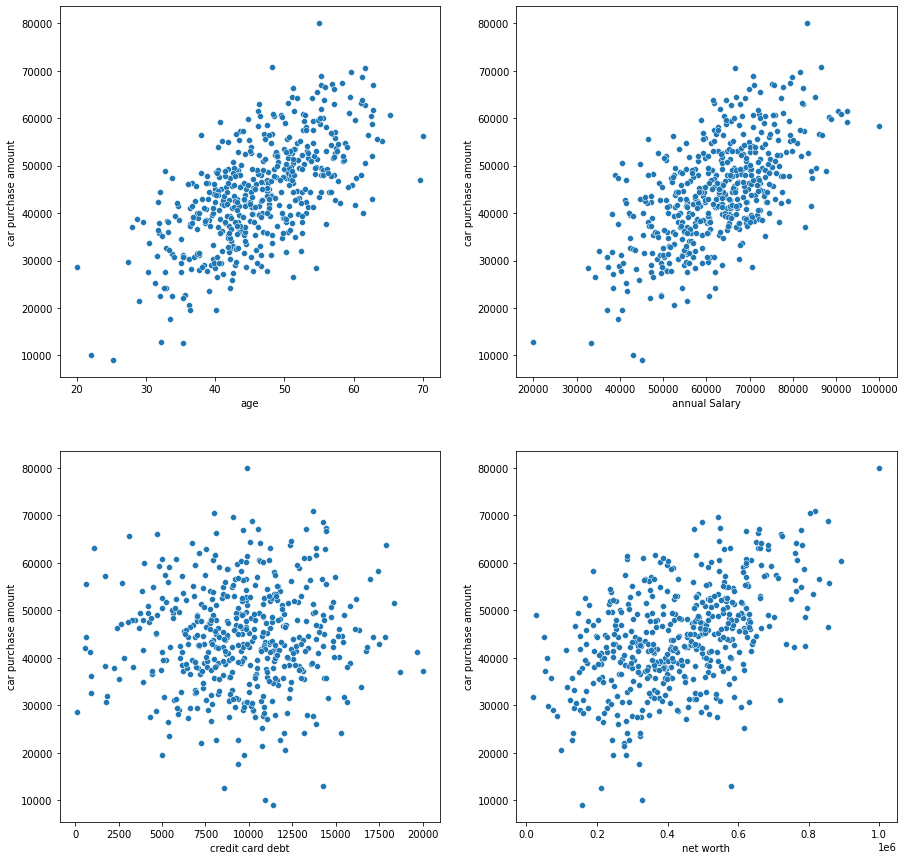

In [14]:
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sb.scatterplot(x=df[i[1]],y=df['car purchase amount'])


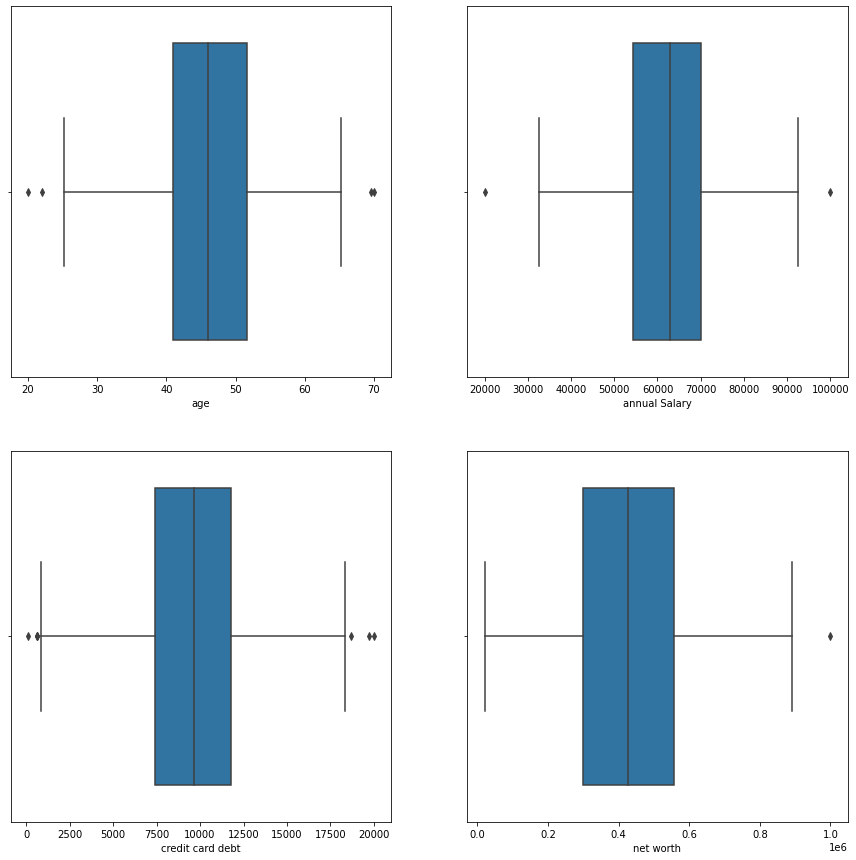

In [15]:
#To check if outlier is present or not
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sb.boxplot(df[i[1]])

In [16]:
#To remove outlier from the data
def remove_outlier(df,col_name):
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    IQR=Q3-Q1
    df_out=df.loc[(df[col_name]>Q1-1.5*IQR)&(df[col_name]<Q3+1.5*IQR)]
    return df_out
df=remove_outlier(df,'age')
df=remove_outlier(df,'credit card debt')
df=remove_outlier(df,'net worth')
df=remove_outlier(df,'annual Salary')

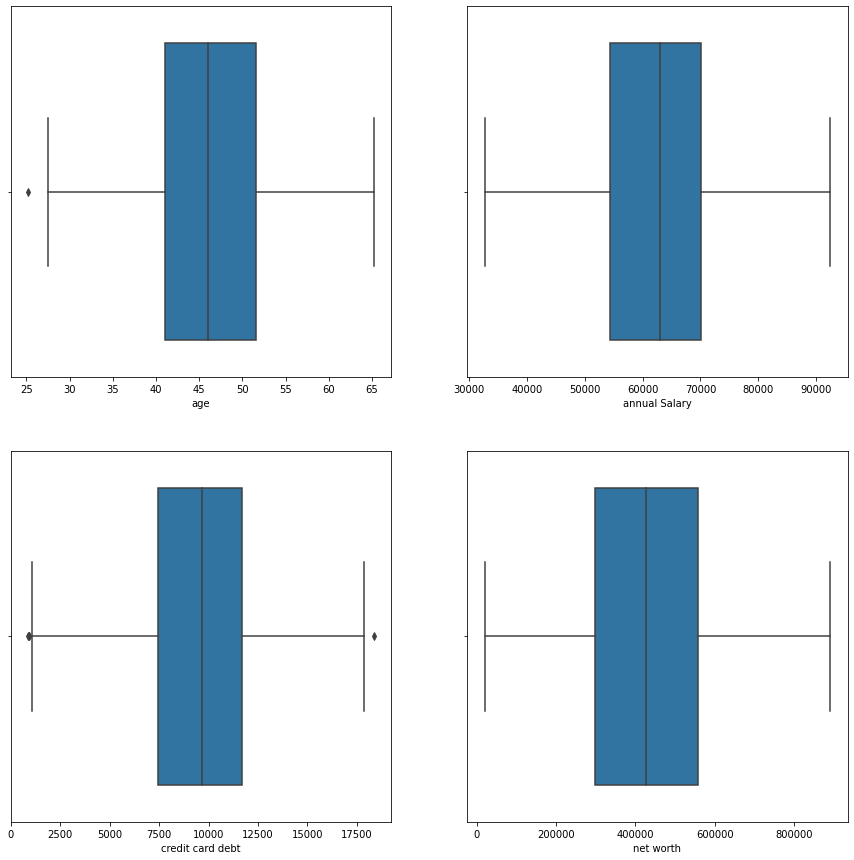

In [17]:
#To see if outlier are remove or not
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sb.boxplot(df[i[1]])

In [18]:
#To select input and output
X=df.drop(columns='car purchase amount')
Y=df['car purchase amount']

In [19]:
#To apply scaling
from sklearn.preprocessing import MinMaxScaler
#create the object of MinMaxScaler
mm=MinMaxScaler()
X_scaled = mm.fit_transform(X)
Y_scaled = mm.fit_transform(Y.values.reshape(-1,1))
X_scaled.shape

(487, 4)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size=0.25,random_state=101)
X_train.shape

(365, 4)

In [21]:
#To import libraries for creating neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [22]:
#create a neural network Ann  
#create the object of Sequential class
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[4]),
    layers.Dense(25, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1,activation='linear')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [25]:
history = model.fit(X_train, y_train, batch_size=16,validation_split=0.2,epochs=50)

Epoch 1/50
19/19 [==============================] - 1s 26ms/step - loss: 0.0761 - val_loss: 0.0134
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0342 - val_loss: 0.0123
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0286 - val_loss: 0.0056
Epoch 4/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0211 - val_loss: 0.0069
Epoch 5/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0216 - val_loss: 0.0040
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0178 - val_loss: 0.0046
Epoch 7/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0161 - val_loss: 0.0031
Epoch 8/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0185 - val_loss: 0.0034
Epoch 9/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0164 - val_loss: 0.0023
Epoch 10/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0132 - val_loss: 0.0024
Epoch 11/50
19/

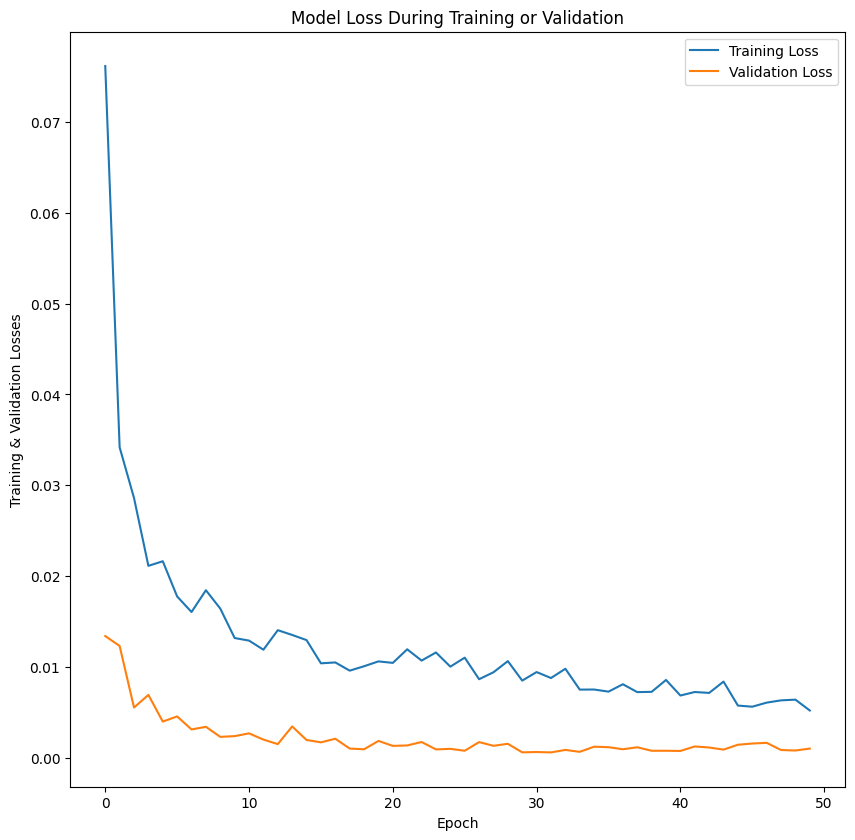

In [26]:
plt.figure(figsize=(10,10),dpi=100)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [27]:
Y_pred=model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_pred)

0.9829736816148898

In [29]:
loss = model.evaluate(X_test, y_test)
print(loss)

4/4 [==============================] - 0s 3ms/step - loss: 4.8273e-04
0.00048273344873450696


In [30]:
def plot_diff(y_true, y_pred, title=''):
    plt.figure(figsize=(4,4),dpi=150)
    plt.scatter(y_true, y_pred,color='blue')
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-10, 10], [-10, 10],color='red')
    plt.show()

4/4 [==============================] - 0s 3ms/step


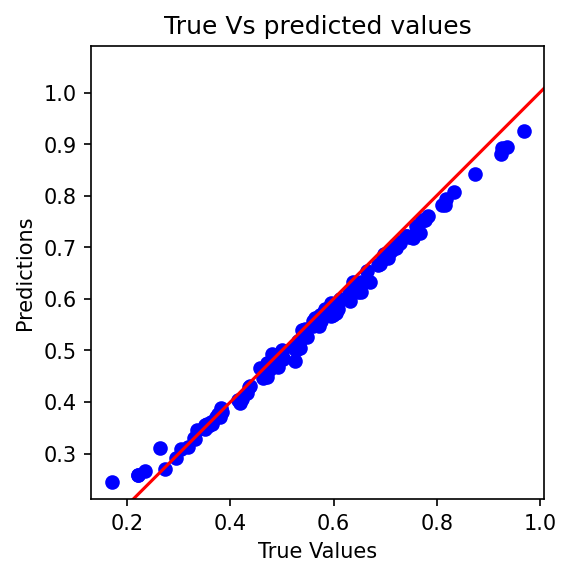

In [31]:
Y_pred = model.predict(X_test)
plot_diff(y_test, Y_pred, title='True Vs predicted values')